In [1]:
import torch, torchaudio
from speech_tokenizer import SpeechTokenizer
import numpy as np
from IPython.display import Audio

device = "cpu"
if torch.cuda.is_available():
    device = "cuda"
elif hasattr(torch.backends, "mps") and torch.backends.mps.is_available():
    device = "mps"
print(f"using device: {device}")

tokenizer = SpeechTokenizer(device=device)


using device: cuda


In [2]:
data_path = "./data/lex_Bassem Youssef： Israel-Palestine, Gaza, Hamas, Middle East, Satire & Fame ｜ Lex Fridman Podcast #424.mp3.npy"
audio_path = "../nanoGPT-master/data/lexaudio/lexscrape/Aaron Smith-Levin： Scientology ｜ Lex Fridman Podcast #361.mp3"
audio = np.load(data_path)
audio_wav, sr = torchaudio.load(audio_path, backend='soundfile')

In [53]:
if sr != 24000:
    resampler = torchaudio.transforms.Resample(orig_freq=sr, new_freq=24000)
    audio_wav = resampler(audio_wav)
    print("resampled")

#encoded = tokenizer.encode([audio_wav])

resampled


In [ ]:
encoded.shape

In [4]:
print(len(audio[0:1024]))
print(list(audio[0:40]))
demo = [4097, 602, 426, 3945, 817, 663, 118, 110, 4097, 1560, 3241, 648, 11, 3142, 228, 444]

1024
[4097, 602, 426, 3945, 817, 663, 118, 110, 4097, 1560, 3241, 648, 11, 3142, 228, 444, 4097, 2143, 4020, 498, 1152, 3595, 2643, 3926, 4097, 1576, 2085, 1616, 3993, 1825, 3318, 3620, 4097, 1832, 1505, 1168, 697, 380, 116, 3385]


In [13]:
l1 = []
l2 = []
l3 = []
for i in range(0, len(demo), 8):
    l1.append(demo[i + 1])
    l2.append(demo[i + 2])
    l3.append(demo[i + 3])
    l3.append(demo[i + 4])

    l2.append(demo[i + 5])
    l3.append(demo[i + 6])
    l3.append(demo[i + 7])
print(l1, l2, l3)

[602, 1560] [426, 663, 3241, 3142] [3945, 817, 118, 110, 648, 11, 228, 444]


In [3]:
data = np.load(data_path)

In [5]:
def find_last_instance_of_seperator(lst, element=4097):
    reversed_list = lst[::-1]
    try:
        reversed_index = reversed_list.index(element)
        return len(lst) - 1 - reversed_index
    except ValueError:
        raise ValueError

out_tok = np.array([list(data[100100:101000])[:find_last_instance_of_seperator(list(data[100100:101000]))]])
decoded = tokenizer.decode(out_tok)
Audio(data=np.array(decoded[0][0].cpu()), rate=24000)

In [1]:
import os
import random

def rename_files(directory, percentage_train):
    # Ensure percentage is between 0 and 100
    if not 0 <= percentage_train <= 100:
        raise ValueError("Percentage should be between 0 and 100")

    # List all files in the directory
    files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]

    # Calculate the number of train and val files
    num_files = len(files)
    num_train = int((percentage_train / 100) * num_files)

    # Shuffle the list of files
    random.shuffle(files)

    # Rename files to have 'train_' or 'val_' prefix
    for i, filename in enumerate(files):
        old_path = os.path.join(directory, filename)
        if i < num_train:
            new_filename = f"train_{filename}"
        else:
            new_filename = f"val_{filename}"
        new_path = os.path.join(directory, new_filename)
        os.rename(old_path, new_path)
        print(f"Renamed '{old_path}' to '{new_path}'")

# Example usage:
rename_files("./data", 90)


Renamed './data/lex_Anca Dragan： Human-Robot Interaction and Reward Engineering ｜ Lex Fridman Podcast #81.mp3.npy' to './data/train_lex_Anca Dragan： Human-Robot Interaction and Reward Engineering ｜ Lex Fridman Podcast #81.mp3.npy'
Renamed './data/lex_Max Tegmark： AI and Physics ｜ Lex Fridman Podcast #155.mp3.npy' to './data/train_lex_Max Tegmark： AI and Physics ｜ Lex Fridman Podcast #155.mp3.npy'
Renamed './data/lex_Ray Kurzweil： Singularity, Superintelligence, and Immortality ｜ Lex Fridman Podcast #321.mp3.npy' to './data/train_lex_Ray Kurzweil： Singularity, Superintelligence, and Immortality ｜ Lex Fridman Podcast #321.mp3.npy'
Renamed './data/lex_Hikaru Nakamura： Chess, Magnus, Kasparov, and the Psychology of Greatness ｜ Lex Fridman Podcast #330.mp3.npy' to './data/train_lex_Hikaru Nakamura： Chess, Magnus, Kasparov, and the Psychology of Greatness ｜ Lex Fridman Podcast #330.mp3.npy'
Renamed './data/lex_Benjamin Netanyahu： Israel, Palestine, Power, Corruption, Hate, and Peace ｜ Lex Fr

In [1]:
val = 'validation'
train = 'train'

with open('./log/log.txt') as f:
    log = [[eval(y) for y in x.strip().split(' ')] for x in f.readlines()]

In [2]:
val_x = [x[0] for x in log if x[1] == val]
val_y = [x[-1] for x in log if x[1] == val]

train_x = [x[0] for x in log if x[1] == train]
train_y = [x[-1] for x in log if x[1] == train]

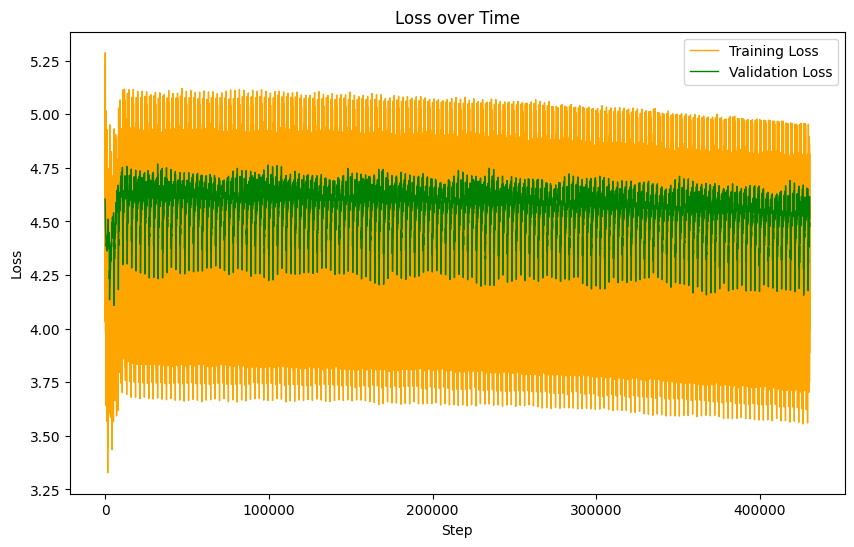

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Data from the provided image for validation and training sets
val_data = {
    "step": val_x,
    "loss": val_y
}

train_data = {
    "step": train_x,
    "loss": train_y
}

# Create DataFrames
val_df = pd.DataFrame(val_data)
train_df = pd.DataFrame(train_data)

# Plotting step vs loss for both validation and training sets
plt.figure(figsize=(10, 6))
plt.plot(train_df['step'], train_df['loss'], label='Training Loss', color='orange', linewidth=1)
plt.plot(val_df['step'], val_df['loss'], label='Validation Loss', color='green', linewidth=1)
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Loss over Time')
# plt.xlim([0, 2000])
plt.legend()
plt.show()


In [32]:
val_df.iloc[val_y.index(min(val_y))]

step    450.0000
loss      5.9357
Name: 18, dtype: float64

In [8]:
from gpt2_infer import GPT, GPTConfig
import torch, torchaudio
from collections import OrderedDict
import numpy as np
from tqdm import tqdm
from torch.nn import functional as F
from speech_tokenizer import SpeechTokenizer

In [5]:
device = "cpu"
if torch.cuda.is_available():
    #device = "cuda"
    pass
elif hasattr(torch.backends, "mps") and torch.backends.mps.is_available():
    device = "mps"
print(f"using device: {device}")

using device: cuda


In [9]:
model = GPT(GPTConfig())

original_state_dict = torch.load('./log/model_141000.pt') #, map_location=torch.device(device)

# Corrected state dictionary
state_dict = {
    'model': OrderedDict([
        (key.replace('_orig_mod.', ''), value) for key, value in original_state_dict['model'].items()
    ]),
    'config': original_state_dict['config'],
    'step': original_state_dict['step'],
    'val_loss': original_state_dict['val_loss']
}

model.load_state_dict(state_dict['model'])
model.eval()
model.to(device)

GPT(
  (transformer): ModuleDict(
    (wte): Embedding(16384, 768)
    (wpe): Embedding(2048, 768)
    (h): ModuleList(
      (0-11): 12 x Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): CausalSelfAttention(
          (c_attn): Linear(in_features=768, out_features=2304, bias=True)
          (c_proj): Linear(in_features=768, out_features=768, bias=True)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): MLP(
          (c_fc): Linear(in_features=768, out_features=3072, bias=True)
          (gelu): GELU(approximate='tanh')
          (c_proj): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=16384, bias=False)
)

In [10]:
unseen = [4097, 547, 426, 2825, 1441, 2209, 1300, 161, 4097, 1646]
seperator = 4097

num_return_sequences = 4
max_length = 2048

tokens = [seperator]
# tokens = unseen
tokens = torch.tensor(tokens, dtype=torch.long)
tokens = tokens.unsqueeze(0).repeat(num_return_sequences, 1)
xgen = tokens.to(device)
sample_rng = torch.Generator(device=device)
sample_rng.manual_seed(42)

output_tokens = []

# Initialize the progress bar
with tqdm(total=max_length) as pbar:
    # Set initial progress
    pbar.update(xgen.size(1))
    
    while xgen.size(1) < max_length:
        # forward the model to get the logits
        with torch.no_grad():
            logits, loss = model(xgen) # (B, T, vocab_size)
            # take the logits at the last position
            logits = logits[:, -1, :] # (B, vocab_size)
            # get the probabilities
            probs = F.softmax(logits, dim=-1)
            # do top-k sampling of 50 (huggingface pipeline default)
            # topk_probs here becomes (5, 50), topk_indices is (5, 50)
            topk_probs, topk_indices = torch.topk(probs, 50, dim=-1)
            # select a token from the top-k probabilities
            # note: multinomial does not demand the input to sum to 1
            ix = torch.multinomial(topk_probs, 1, generator=sample_rng) # (B, 1)
            # gather the corresponding indices
            xcol = torch.gather(topk_indices, -1, ix) # (B, 1)
            # append to the sequence
            xgen = torch.cat((xgen, xcol), dim=1)

            pbar.update(1)  # Update by the number of new tokens added
    # print the generated text
    for i in range(num_return_sequences):
        tokens = xgen[i, :max_length].tolist()
        output_tokens.append(tokens)

with torch.no_grad():
    del xgen
    torch.cuda.empty_cache()



100%|██████████| 2048/2048 [00:58<00:00, 35.10it/s]


In [12]:
tokenizer = SpeechTokenizer(device=device)

def find_last_instance_of_seperator(lst, element=4097):
    reversed_list = lst[::-1]
    try:
        reversed_index = reversed_list.index(element)
        return len(lst) - 1 - reversed_index
    except ValueError:
        raise ValueError

In [13]:
np.array(output_tokens).shape

(4, 1024)

In [20]:
audio_out1 = tokenizer.decode(np.array([output_tokens[0][:find_last_instance_of_seperator(output_tokens[0])]]))
audio_out2 = tokenizer.decode(np.array([output_tokens[1][:find_last_instance_of_seperator(output_tokens[0])]]))
audio_out3 = tokenizer.decode(np.array([output_tokens[2][:find_last_instance_of_seperator(output_tokens[0])]]))
audio_out4 = tokenizer.decode(np.array([output_tokens[3][:find_last_instance_of_seperator(output_tokens[0])]]))

In [ ]:
print(list(np.load('./data/sherlock_train_02.npy')[:512]))

In [18]:
from IPython.display import Audio
Audio(data=audio_out1[0].cpu().numpy(), rate=24000)

In [21]:
Audio(data=audio_out2[0].cpu().numpy(), rate=24000)

In [22]:
Audio(data=audio_out3[0].cpu().numpy(), rate=24000)

In [23]:

Audio(data=audio_out4[0].cpu().numpy(), rate=24000)